<a href="https://colab.research.google.com/github/infiniteoverflow/Intel-Image-Classification-Challenge/blob/master/Image_Scene_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

# Upload kaggle.json

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification

 96% 332M/346M [00:04<00:00, 91.8MB/s]
100% 346M/346M [00:04<00:00, 83.9MB/s]


In [4]:
!unzip intel-image-classification.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/seg_train/seg_train/mountain/7537.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7539.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7551.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7560.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7565.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7578.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7581.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7586.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7647.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7652.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7654.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7662.jpg  
  inflating: dataset/seg_train/seg_train/mountain/767.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7672.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7679.jpg  
  inflating: dataset/seg_train/seg_

In [5]:
import glob
import numpy as np
import matplotlib.pyplot as plt


In [6]:
glob.glob('/content/dataset/seg_train/seg_train/*')

['/content/dataset/seg_train/seg_train/buildings',
 '/content/dataset/seg_train/seg_train/glacier',
 '/content/dataset/seg_train/seg_train/mountain',
 '/content/dataset/seg_train/seg_train/sea',
 '/content/dataset/seg_train/seg_train/forest',
 '/content/dataset/seg_train/seg_train/street']

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = datagen.flow_from_directory(
    directory = r"/content/dataset/seg_train/seg_train/",
    target_size=(150,150),
)

Found 14034 images belonging to 6 classes.


In [4]:
type(train_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [5]:
test_generator = datagen.flow_from_directory(
    directory = r'/content/dataset/seg_test/seg_test/',
    target_size = (150,150),
)

Found 3000 images belonging to 6 classes.


## InceptionV3

In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [7]:
base_model = InceptionV3(include_top=False,weights='imagenet',input_shape=(150,150,3))

In [8]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [9]:
for layer in base_model.layers:
  layer.trainable = False

In [10]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [11]:
x = base_model.output

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dropout(0.25)(x)
predictions = tf.keras.layers.Dense(6, activation='softmax')(x)

In [12]:
model = tf.keras.models.Model(inputs=base_model.input,outputs=predictions)

In [13]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [14]:
model.compile(
    optimizer='rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [15]:
model.fit_generator(
    train_generator,
    epochs=5,
    validation_data = test_generator
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
439/439 [==============================] - 26s 59ms/step - loss: 2.7197 - accuracy: 0.8015 - val_loss: 0.3779 - val_accuracy: 0.8773
Epoch 2/5
439/439 [==============================] - 24s 54ms/step - loss: 0.6216 - accuracy: 0.8563 - val_loss: 0.6057 - val_accuracy: 0.8710
Epoch 3/5
439/439 [==============================] - 24s 54ms/step - loss: 0.5430 - accuracy: 0.8794 - val_loss: 0.4595 - val_accuracy: 0.8863
Epoch 4/5
439/439 [==============================] - 24s 54ms/step - loss: 0.5137 - accuracy: 0.8912 - val_loss: 0.4485 - val_accuracy: 0.8867
Epoch 5/5
439/439 [==============================] - 23s 53ms/step - loss: 0.4336 - accuracy: 0.9021 - val_loss: 0.5108 - val_accuracy: 0.8893


In [24]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import glob
import matplotlib.pyplot as plt
import numpy as np

images = glob.glob('/content/dataset/seg_pred/seg_pred/*')

image = load_img(images[0],target_size=(150,150))

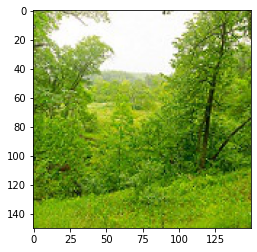

In [25]:
image = img_to_array(image)
image = image/255.0
plt.imshow(image)

In [26]:
image = image.reshape((1,150,150,3))

In [27]:
image.shape

(1, 150, 150, 3)

In [28]:
np.argmax(model.predict(image))

1

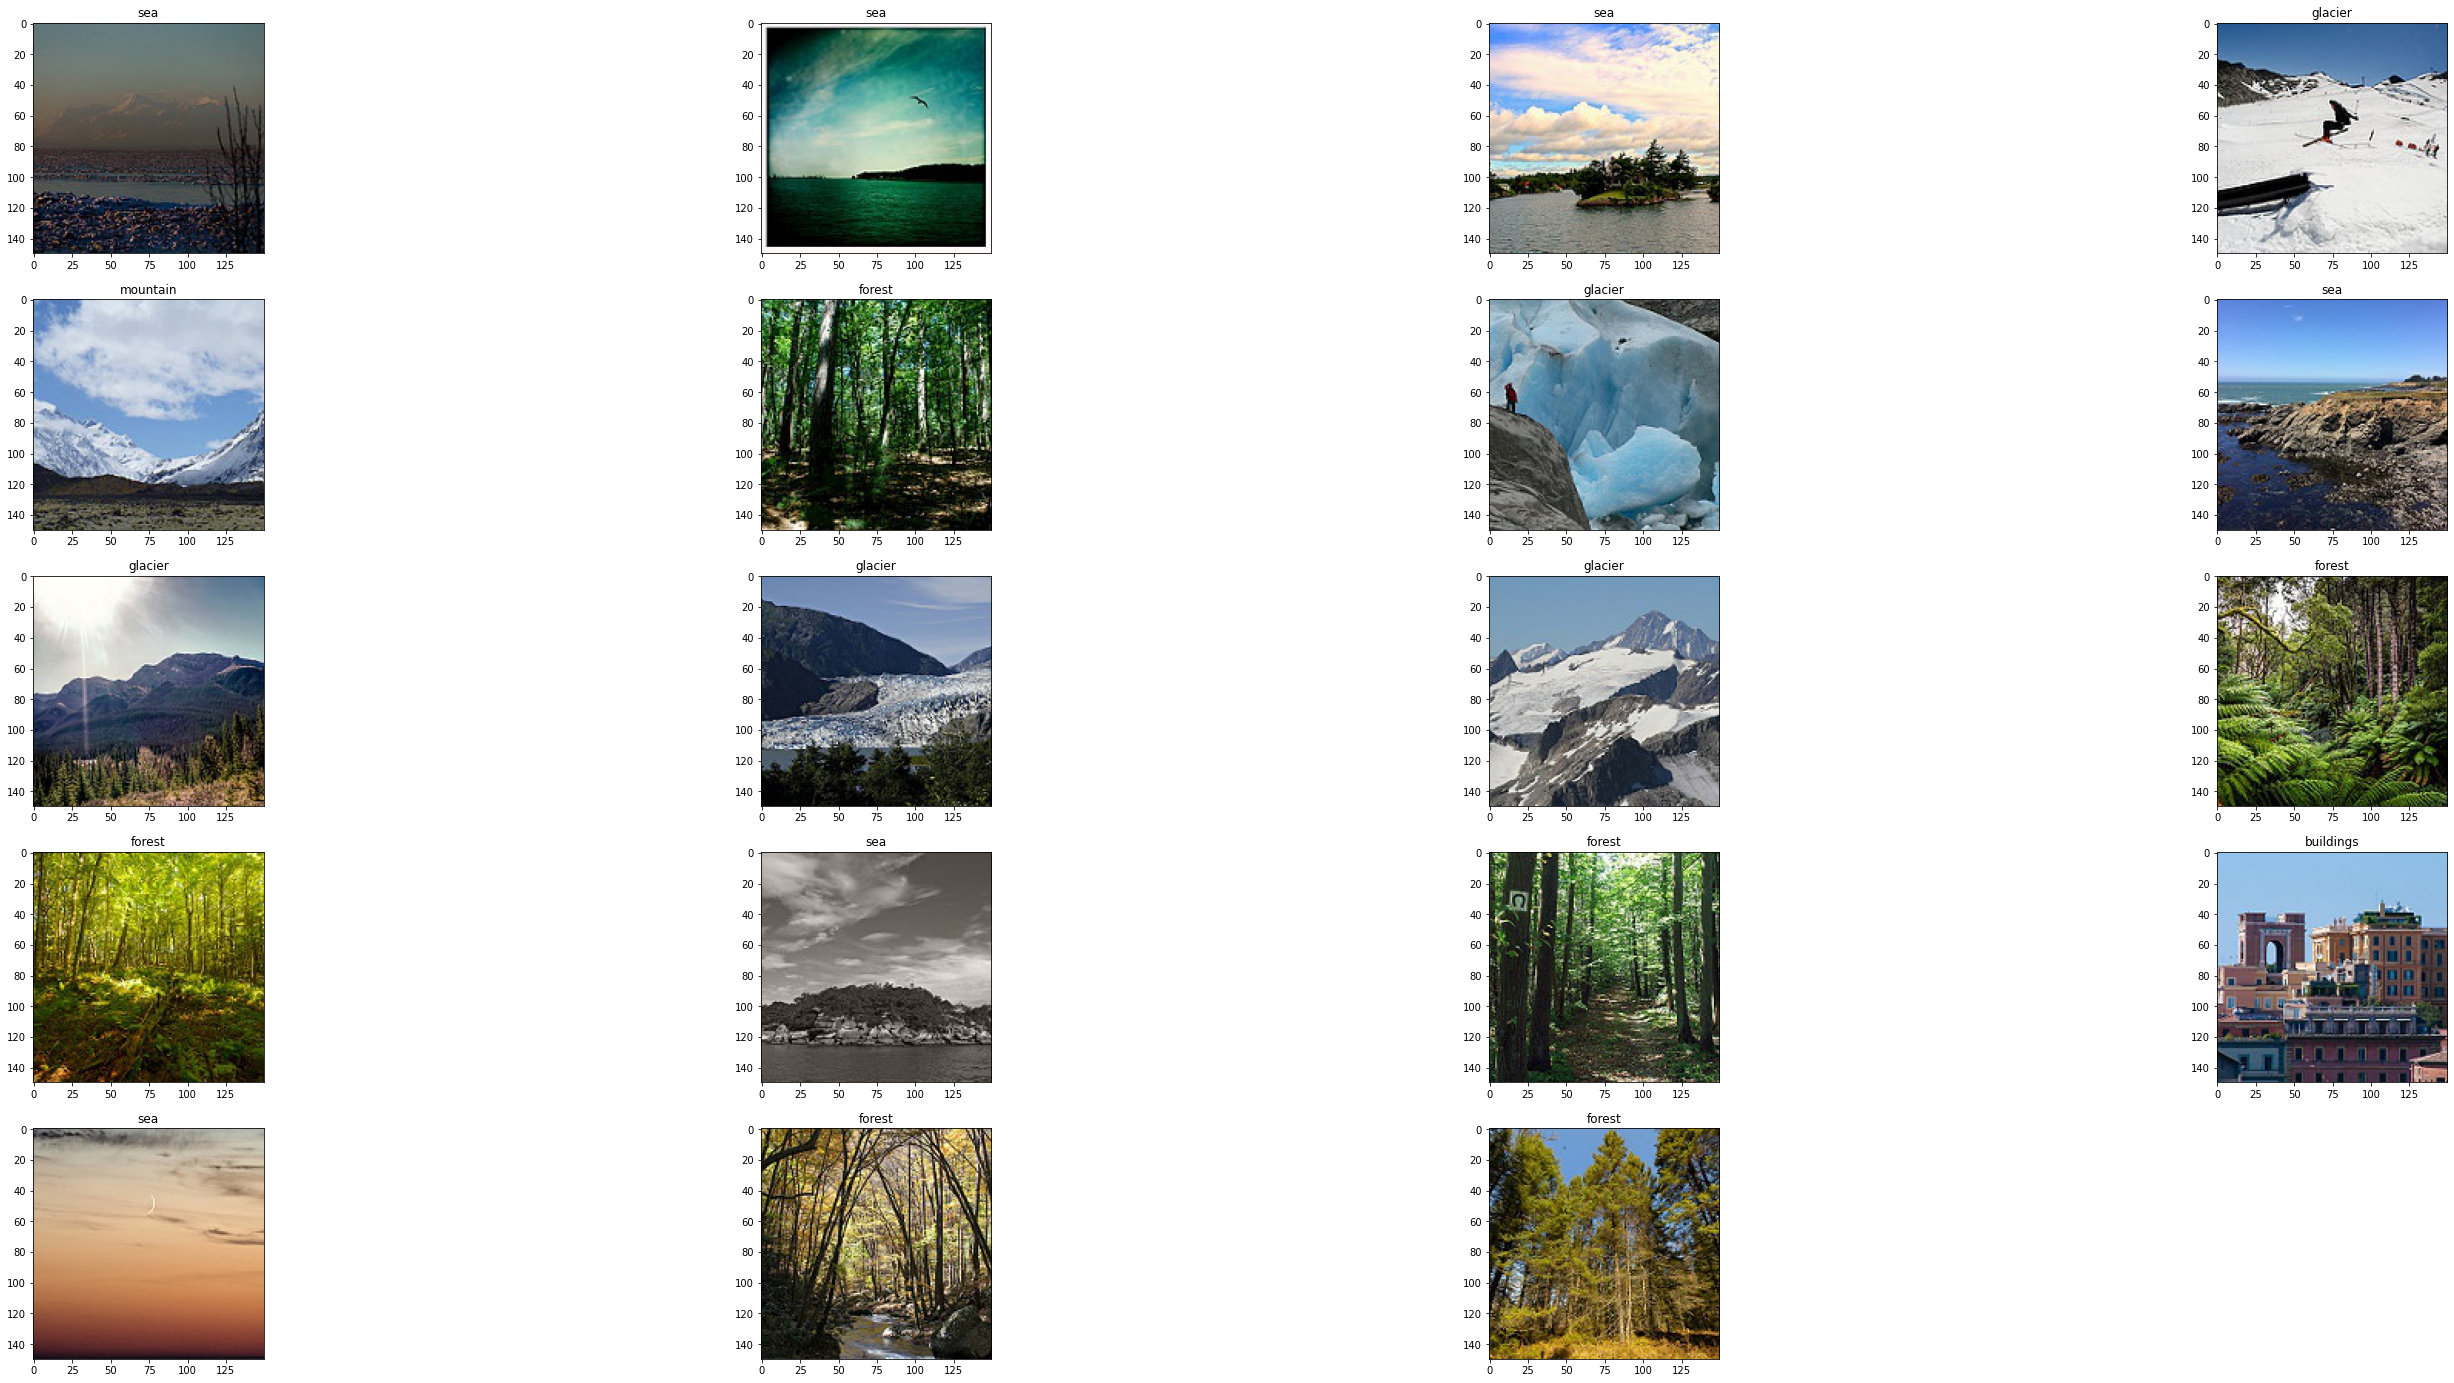

In [42]:
import matplotlib.pyplot as plt

labels = [
  'buildings',
  'forest',
  'glacier',
  'mountain',
  'sea',
  'street'
]

w=10
h=10
fig=plt.figure(figsize=(50, 50))
columns = 4
rows = len(images)//4

for index in range(1,20):
  img = load_img(images[index],target_size=(150,150))
  img = img_to_array(img)
  img = img/255.0
  img = img.reshape((1,150,150,3))

  title = np.argmax(model.predict(img))

  fig.add_subplot(10,4, index)
  plt.imshow(img.reshape((150,150,3)))
  plt.title(labels[title],loc='center')

plt.show()

## VGG16

In [43]:
from tensorflow.keras.applications.vgg16 import VGG16

In [44]:
base_model = VGG16(include_top=False,weights='imagenet',input_shape=(150,150,3))

58892288/58889256 [==============================] - 0s 0us/step


In [45]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [46]:
for layer in base_model.layers:
  layer.trainable = False

In [47]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [48]:
x = base_model.output

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dropout(0.25)(x)
predictions = tf.keras.layers.Dense(6, activation='softmax')(x)

In [49]:
model = tf.keras.models.Model(inputs=base_model.input,outputs=predictions)

In [50]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [51]:
model.fit_generator(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

Epoch 1/5
439/439 [==============================] - 40s 91ms/step - loss: 0.7024 - accuracy: 0.7892 - val_loss: 0.4294 - val_accuracy: 0.8280
Epoch 2/5
439/439 [==============================] - 37s 84ms/step - loss: 0.3921 - accuracy: 0.8613 - val_loss: 0.3911 - val_accuracy: 0.8603
Epoch 3/5
439/439 [==============================] - 37s 85ms/step - loss: 0.3449 - accuracy: 0.8801 - val_loss: 0.3857 - val_accuracy: 0.8637
Epoch 4/5
439/439 [==============================] - 37s 85ms/step - loss: 0.2961 - accuracy: 0.8963 - val_loss: 0.4387 - val_accuracy: 0.8627
Epoch 5/5
439/439 [==============================] - 37s 85ms/step - loss: 0.2695 - accuracy: 0.9106 - val_loss: 0.4672 - val_accuracy: 0.8627
